In [6]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\hanna\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [8]:
# To predict whether a student will drop out using logistic regression, and evaluate the model with metrics using a classification report and confusion matrix

import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load dataset
dataset = fetch_ucirepo(id=697)
X = dataset.data.features
y = dataset.data.targets['Target']  # 'Dropout', 'Graduate', 'Enrolled'

# Convert target to binary (e.g., Dropout = 1, others = 0)
y_binary = y.apply(lambda x: 1 if x == 'Dropout' else 0)

# Select relevant academic performance columns
academic_cols = ['Admission grade', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (grade)']

# one-hot encoding - turn all the categorical columns into numbers so that machine learning models can use them
X_encoded = pd.get_dummies(X, drop_first=True) # Dropping the first category to avoid multicollinearity

# Ensure academic columns are included
for col in academic_cols:
    if col not in X_encoded.columns:
        X_encoded[col] = X[col]

# Scale features
scaler = StandardScaler() #Scaling all features in the dataset so that  mean = 0 and standard deviation = 1. This is a preprocessing step for logistic regression.
X_scaled = scaler.fit_transform(X_encoded)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)

# Train logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Model evaluation
y_pred = logreg.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature coefficients
coef_df = pd.DataFrame({  #Display the predictor variables from the logistic regression model along with their corresponding coefficients
    'Feature': X_encoded.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False) #Sort variables by their influence (magnitude of the coefficient) on the Target column

print("\n Top Influential Features (Logistic Regression Coefficients):")
print(coef_df.head(10))

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.95      0.90       569
           1       0.88      0.72      0.79       316

    accuracy                           0.87       885
   macro avg       0.87      0.83      0.85       885
weighted avg       0.87      0.87      0.86       885


 Top Influential Features (Logistic Regression Coefficients):
                                Feature  Coefficient
30  Curricular units 2nd sem (approved)    -1.866441
28  Curricular units 2nd sem (enrolled)     1.114171
24  Curricular units 1st sem (approved)    -0.976295
16              Tuition fees up to date    -0.762553
27  Curricular units 2nd sem (credited)     0.484580
21  Curricular units 1st sem (credited)     0.420171
19                    Age at enrollment     0.382771
31     Curricular units 2nd sem (grade)    -0.368263
10                  Mother's occupation    -0.336134
25     Curricular units 1st sem (grade)     0.291597


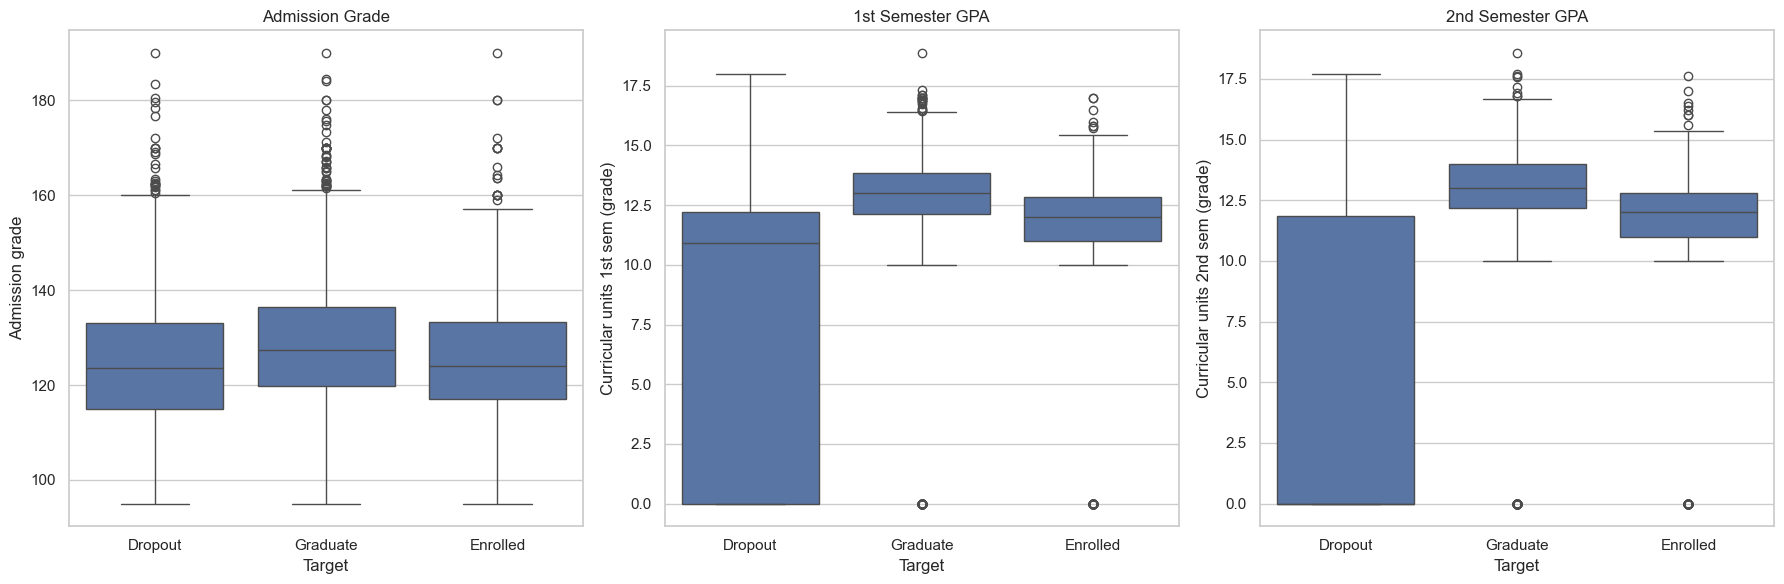

In [9]:
# To train a Random Forest model on the same encoded data and find the top 10 influential features

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Load dataset
dataset = fetch_ucirepo(id=697)
df = dataset.data.original

# Clean column names
df.columns = df.columns.str.strip()

# Drop rows with missing data in required columns
cols_to_plot = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)',
    'Target'
]
df_filtered = df.dropna(subset=cols_to_plot)

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot each GPA related variable by target variables
sns.boxplot(data=df_filtered, x='Target', y='Admission grade', ax=axes[0])
axes[0].set_title('Admission Grade')

sns.boxplot(data=df_filtered, x='Target', y='Curricular units 1st sem (grade)', ax=axes[1])
axes[1].set_title('1st Semester GPA')

sns.boxplot(data=df_filtered, x='Target', y='Curricular units 2nd sem (grade)', ax=axes[2])
axes[2].set_title('2nd Semester GPA')

plt.tight_layout()
plt.show()

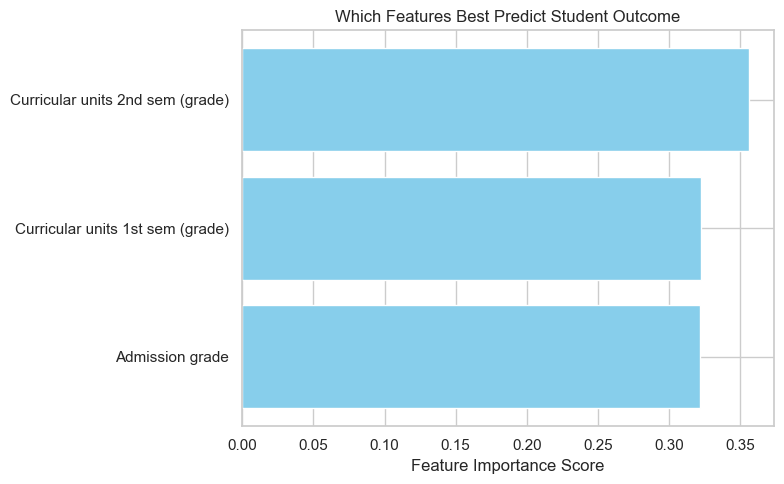

In [ ]:
# To train a Random Forest model on the same encoded data and find the top 10 influential features

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encode target labels
df_ml = df_filtered.copy()
label_encoder = LabelEncoder()
df_ml['Target_encoded'] = label_encoder.fit_transform(df_ml['Target'])

# Define features and target
features = [
    'Admission grade',
    'Curricular units 1st sem (grade)',
    'Curricular units 2nd sem (grade)'
]
X = df_ml[features]
y = df_ml['Target_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot feature importances
importances = model.feature_importances_ #"feature_importances" shows how important each feature is in predicting the outcome
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Which Features Best Predict Student Outcome")
plt.tight_layout()
plt.show()

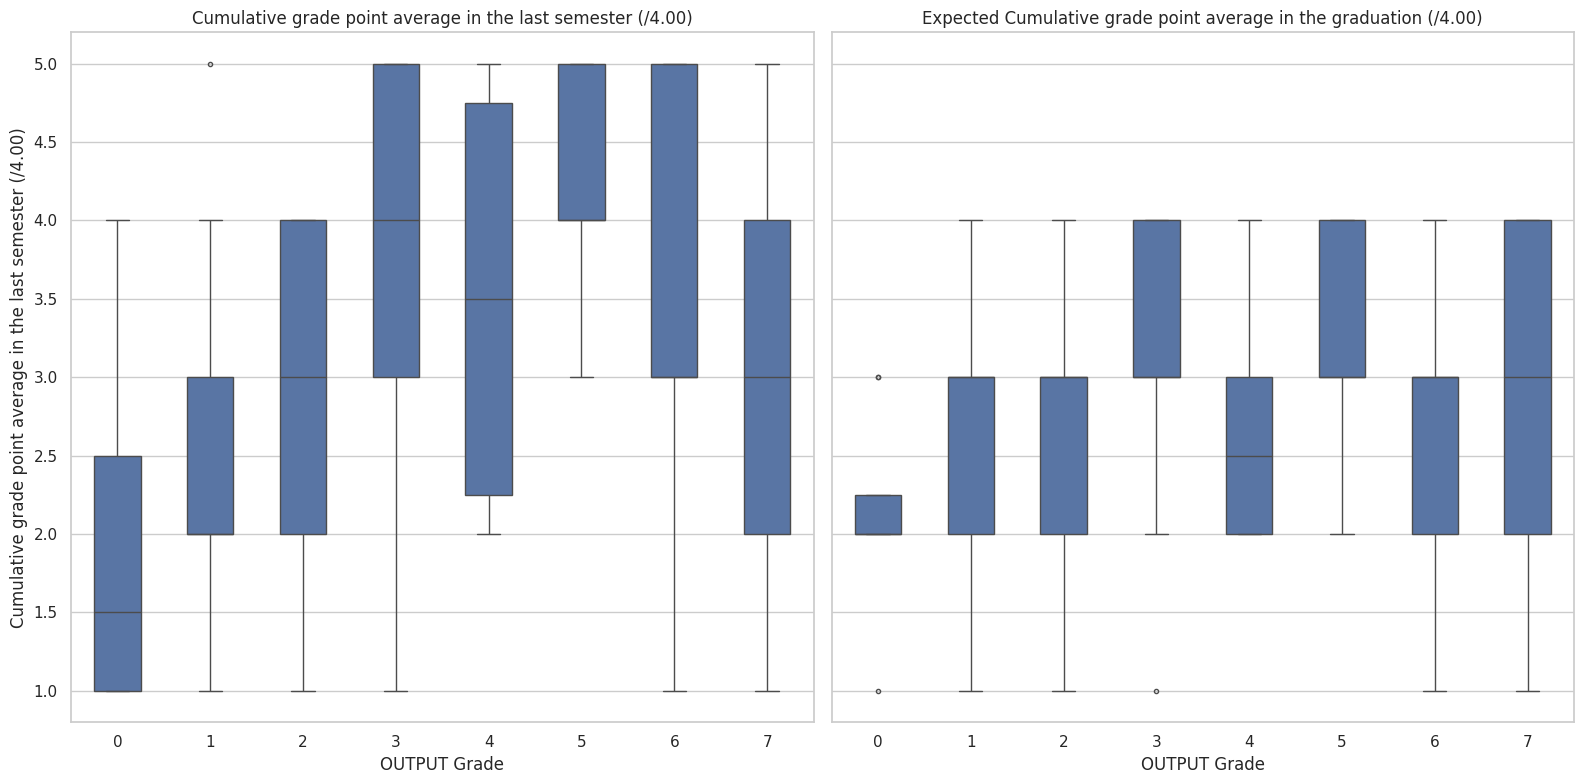

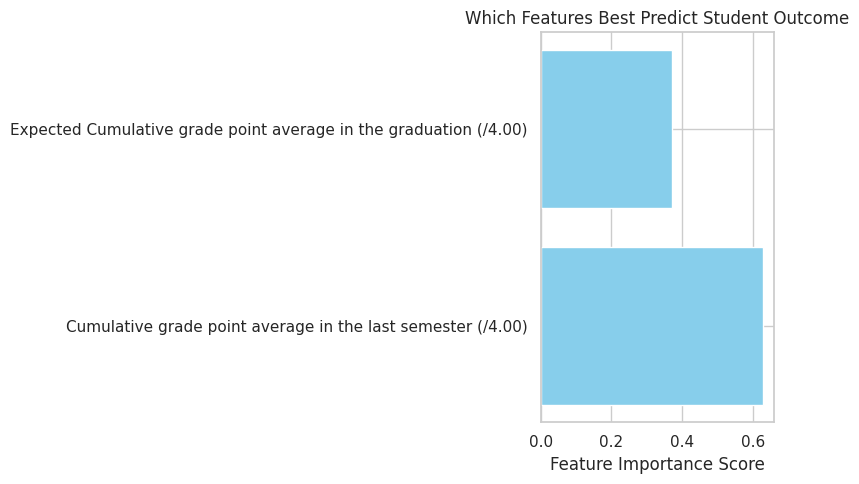

In [ ]:
# To analyze the relationship between GPA and student outcomes, and find the feature importance scores using a Random Forest model

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Load dataset
dataset_2 = fetch_ucirepo(id=856)
df_2 = dataset_2.data.original

# data (as pandas dataframes)
X_2 = dataset_2.features
y_2 = dataset_2.targets

# Drop rows with missing data in required columns
cols_to_plot_2 = [
    'Cumulative grade point average in the last semester (/4.00)',
    'Expected Cumulative grade point average in the graduation (/4.00)',
    'OUTPUT Grade'
]

df_filtered_2 = df_2.dropna(subset=cols_to_plot_2)

# Set seaborn style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharey = True)

# Plot each GPA-related variable by Target (Dropout/Enrolled/Graduate)
sns.boxplot(data=df_filtered_2, x='OUTPUT Grade', y='Cumulative grade point average in the last semester (/4.00)', ax=axes[0], width = 0.5, fliersize=3)
axes[0].set_title('Cumulative grade point average in the last semester (/4.00)')

sns.boxplot(data=df_filtered_2, x='OUTPUT Grade', y='Expected Cumulative grade point average in the graduation (/4.00)', ax=axes[1], width = 0.5, fliersize=3)
axes[1].set_title('Expected Cumulative grade point average in the graduation (/4.00)')

plt.tight_layout()
plt.show()


#Find the Feature Importance Scores
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode target labels
df_ml_2 = df_filtered_2.copy()
label_encoder = LabelEncoder()
df_ml_2['Target_encoded_2'] = label_encoder.fit_transform(df_ml_2['OUTPUT Grade'])

# Define features and target
features = ['Cumulative grade point average in the last semester (/4.00)',
    'Expected Cumulative grade point average in the graduation (/4.00)']

X_2 = df_ml_2[features]
y_2 = df_ml_2['Target_encoded_2']

# Train-test split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    X_2, y_2, test_size=0.3, random_state=42
)

# Train Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_2, y_train_2)

# Plot feature importances
importances = model.feature_importances_
plt.figure(figsize=(8, 5))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.title("Which Features Best Predict Student Outcome")
plt.tight_layout()
plt.show()

In [11]:
# To predict the output grade using linear regression and evaluate the model with RMSE

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from ucimlrepo import fetch_ucirepo

# Load wine dataset
dataset = fetch_ucirepo(id=856)
df = dataset.data.original  # full DataFrame with features + target

# Define features and target
X = df[['Cumulative grade point average in the last semester (/4.00)',
    'Expected Cumulative grade point average in the graduation (/4.00)']]  
y = df['OUTPUT Grade']  # target column

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and calculate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 2.077135436034905


In [13]:
#Map OUTPUT Grade (0-7) to 1-5 Scale - A less accurate method

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from ucimlrepo import fetch_ucirepo

dataset = fetch_ucirepo(id=856)
df = dataset.data.original

# Map OUTPUT Grade (0-7) to 1-5 scale
def map_output_grade_to_5levels(val):
    if val <= 1:
        return 1
    elif val <= 3:
        return 2
    elif val == 4:
        return 3
    elif val == 5:
        return 4
    else:
        return 5

df['OUTPUT Grade Synced'] = df['OUTPUT Grade'].apply(map_output_grade_to_5levels)

X = df[['Cumulative grade point average in the last semester (/4.00)',
        'Expected Cumulative grade point average in the graduation (/4.00)']]
y = df['OUTPUT Grade Synced']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1.4164594883885404


In [ ]:
#Map OUTPUT Grade to 4.0 GPA scale - A better method with lower Root Mean Squared Error.
#It measures the average magnitude of errors between predicted values and actual values

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from ucimlrepo import fetch_ucirepo

# Load dataset
dataset = fetch_ucirepo(id=856)
df = dataset.data.original

# Map OUTPUT Grade to GPA scale
grade_to_gpa = {
    0: 0.0,
    1: 1.0,
    2: 1.5,
    3: 2.0,
    4: 2.5,
    5: 3.0,
    6: 3.5,
    7: 4.0
}
df['OUTPUT Grade Synced'] = df['OUTPUT Grade'].map(grade_to_gpa)

# Select GPA features
X = df[[
    'Cumulative grade point average in the last semester (/4.00)',
    'Expected Cumulative grade point average in the graduation (/4.00)'
]]

# Use mapped output grade as target
y = df['OUTPUT Grade Synced']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression() #Predict a continuous target variable based on one or more input features
model.fit(X_train, y_train)

# Predict and evaluate RMSE
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 1.1560844539226343


In [16]:
# Print the intercept of the linear regression model above
print("Intercept:", model.intercept_)

# Print the coefficients with their corresponding feature names
for feature, coef in zip(X.columns, model.coef_):
    print(f"Coefficient for {feature}: {coef:.4f}")

Intercept: 1.2229976745904942
Coefficient for Cumulative grade point average in the last semester (/4.00): 0.3023
Coefficient for Expected Cumulative grade point average in the graduation (/4.00): -0.0216
